In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import time
from PIL import Image


In [4]:
def load_dataset(dataset_folder):
    """
    Reads a dataset in the given folder structure and returns two arrays for images and labels.

    Parameters:
    - dataset_folder (str): Path to the folder containing the dataset.

    Returns:
    - images (list): List of NumPy arrays representing images.
    - labels (list): List of corresponding class labels.
    """

    # Initialize lists to store images and labels
    images = []
    labels = []

    # Iterate through the folders (class labels)
    for class_label in os.listdir(dataset_folder):
        class_path = os.path.join(dataset_folder, class_label)

        # Check if it's a directory
        if os.path.isdir(class_path):
            # Iterate through images in the directory
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)

                # Load image using Pillow
                try:
                    image = Image.open(image_path)
                    # Convert image to NumPy array and normalize pixel values
                    image_array = np.array(image) / 255.0
                    images.append(image_array)
                    labels.append(class_label)
                except Exception as e:
                    print(f"Error loading image {image_path}: {str(e)}")

    return np.array(images), np.array(labels)

dataset_folder = "data/Dataset"
images, labels = load_unzipped_dataset(dataset_folder)

images.shape, labels.shape

((6400, 128, 128), (6400,))

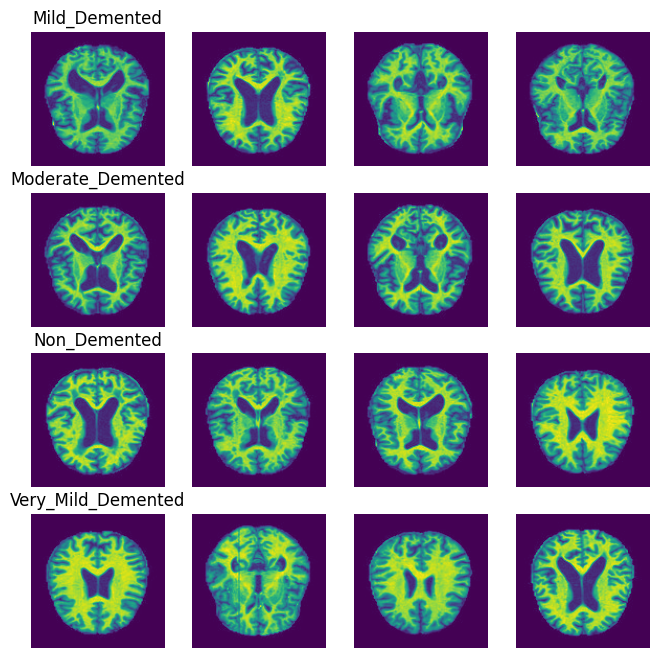

In [5]:
# Plot 4 images from each of the 4 classes
classes = np.unique(labels)
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
for cls, ax in zip(classes, axes):
    cls_images = images[labels == cls]
    for i, image in enumerate(cls_images[:4]):
        ax[i].imshow(image)
        ax[i].axis("off")
        if i == 0:
            ax[i].set_title(cls)

In [6]:
# Get the no of entries in each class
unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))


{'Mild_Demented': 896,
 'Moderate_Demented': 64,
 'Non_Demented': 3200,
 'Very_Mild_Demented': 2240}

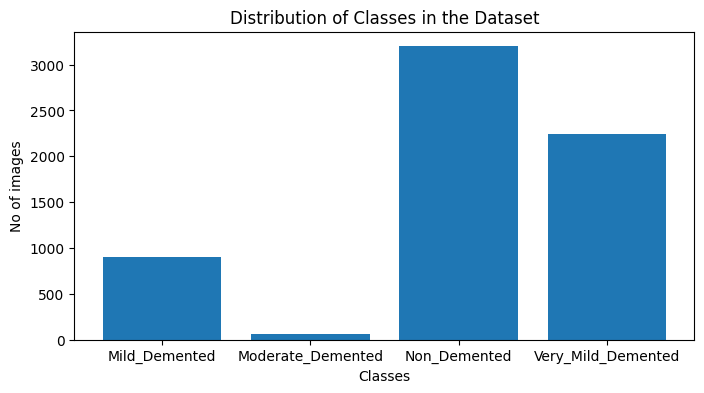

In [16]:
# Plot the distribution of images across classes
plt.figure(figsize=(8, 4))
plt.bar(unique, counts)
plt.xticks(unique)
plt.xlabel("Classes")
plt.ylabel("No of images")
plt.title('Distribution of Classes in the Dataset')

plt.show()
